In [1]:
import telebot
from telebot.types import InlineKeyboardMarkup, InlineKeyboardButton #per bottoni a schermo
from telebot import types

TOKEN="2064761654:AAH0zSYFbhQ1jP5N_bYs_hI_ja2yrWvcRFU"

bot = telebot.TeleBot(TOKEN)


In [2]:
@bot.message_handler(commands=["start"])
def start(message):
    bot.reply_to(message,"ciao")
    print(message.text) #stampera /start
    
@bot.message_handler(commands=["help"])
def start(message):
    bot.reply_to(message,"help")
    

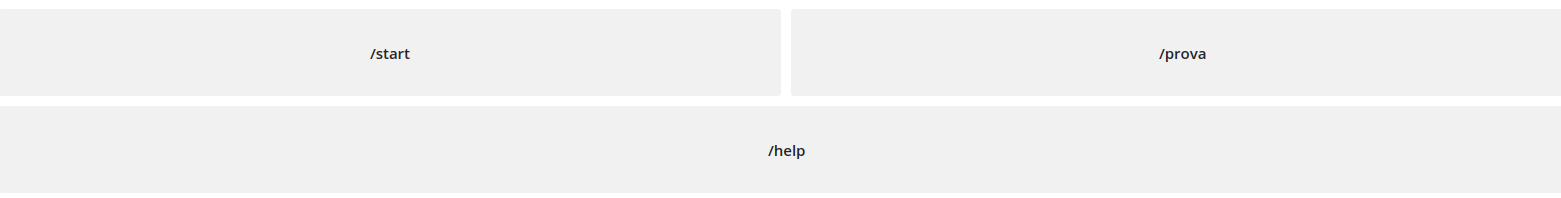

In [3]:
@bot.message_handler(commands=["bottoniTastiera"])
def start(message):
    markup = types.ReplyKeyboardMarkup(one_time_keyboard=True)
    markup.add('/start','/tastiSchermo')
    markup.add('/help')
    bot.reply_to(message,"Ciao",reply_markup=markup) 

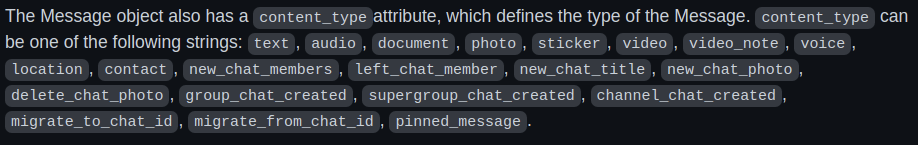

In [4]:
@bot.message_handler(content_types=['photo','sticker'])
def multimedia(message):
    bot.reply_to(message,'multimedia arrivato')

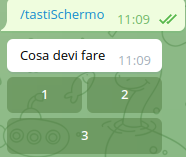

In [5]:
@bot.message_handler(commands=["tastiSchermo"])
def startBottoni2(message):
    bot.send_message(message.chat.id,'Cosa devi fare ', reply_markup=startBottoni2())



def startBottoni2():
    print('ciao')
    bottoni=InlineKeyboardMarkup()
    bottoni.row(InlineKeyboardButton('1',callback_data='uno'),InlineKeyboardButton('2',callback_data='due'))
    bottoni.row(InlineKeyboardButton('3',callback_data='tre')) 
    bottoni.row(InlineKeyboardButton('piuPassaggi',callback_data='piu')) 
    return bottoni


@bot.callback_query_handler(func=lambda call: True)   #####################################  callback
def callback_query(call):
          
     if call.data=='uno':
            bot.reply_to(call.message,"1")
            
     elif call.data=='due':
         bot.reply_to(call.message,"2")
         
     elif call.data=="tre":
         bot.reply_to(call.message,"3")
     elif call.data=="piu":####################################################CONTINUA#########################
        mes=bot.reply_to(call.message,'concatenazione di passaggi')
        bot.register_next_step_handler(mes,funzione1)###################################################################

# tramite il medoto register_next_step_handler facciamo una concatenazione di metodi dopo una cosa viene un'altra......

In [6]:
def funzione1(message):
    print('funzione1')
    mes=bot.reply_to(message,'concatenazione di passaggi')
    bot.register_next_step_handler(mes,funzione2)
    
def funzione2(message):
    print('funzione2')
    mes=bot.reply_to(message,'concatenazione di passaggi')
    bot.register_next_step_handler(mes,funzione3)
    
def funzione3(message):
    print('funzione3')
    mes=bot.reply_to(message,'fine concatenazione')
    

# messaggi di testo

In [7]:
#ascolta messaggi di testo 
# Handle all other messages with content_type 'text' (content_types defaults to ['text'])
@bot.message_handler(func=lambda message: True)
def echo_message(message):
    bot.reply_to(message,'so solo riponderti con: Ciao')

In [ ]:
bot.polling() #obbligatorio per avviare il bot

/start
ciao
